# Notebook 1: RC circuit und Euler-vorwärts-Verfahren

**Computergestützte Biologie I -  SoSe 25**

Anian Kerscher

---

I:

partielle DGL enthält partielle Ableitung

eine unabhängige, beliebt abhängige bei gewöhnlich

mehr unabhängige bei partiell, auch beliebte abhängige

II:

A: gewöhnlich, abhängig: x, unabhängig: t, erste Ordnung, linear, homogen, autonom, 1

B: partiell, abhängig: y, unabhängig: x, erste Ordnung, linear, nicht-homogen, nicht autonom, 1

C: gewöhnlich, abhängig z, unabhängig: v, zweite Ordnung, linear, nicht-homogen, autonom, 2

D: partiell, abhängig z, unabhängig y, erste Ordnung, nicht-linear, nicht-homogen, nicht-autonom, 1

III: 

### Aufgabe 1: Grundlagen zu Differentialgleichungen
<span style="font-size: 90%;"><i>(vgl. Matheskript C 13–14)</i></span>

---

**A)**  ${dx \over dt} - 5x = 0$

**B)**  ${dy \over dx} = -y + e^{-x}$  

**C)**  ${d^2z \over dv^2} - z - 3 = 0$  

**D)**  ${dz \over dy} = 7z^2 y^3$

---

**i)**  <br>
Geben Sie den Unterschied zwischen *gewöhnlichen* und *partiellen* Differentialgleichungen an.  
Wie viele abhängige und unabhängige Variablen sind jeweils möglich?

---

**ii)**  <br>
Charakterisieren Sie die 4 Differentialgleichungen anhand folgender Kriterien:

- Typ (gewöhnlich oder partiell)
- Abhängige und unabhängige Variablen
- Ordnung
- Linearität
- Falls linear:
  - Homogenität
  - Autonomität
- Wie viele Rand- bzw. Anfangsbedingungen sind erforderlich, um eine eindeutige Lösung zu bestimmen?

---

**iii)**  <br>
Welche der folgenden Lösungen passt zu welcher Differentialgleichung?  <br>
$x$: abhängige Variable, $t$: unabhängige Varibale

I)  $x(t) = c_1 e^{-t} + t e^{-t}$

II)   $x(t) = c_1 e^{5t}$

III) $x(t) = {-1 \over {7 / 4 t^4 + c_1  }}$

IV)  $x(t) = c_1 \sin(t) + c_2 \cos(t) - 3$

---

**iv)**  <br>
Geben Sie für A) und B) mögliche Anfangsbedingungen sowie die zugehörige spezielle Lösung an.  
*(Für Schnelle: Tun Sie dies auch für C) und D).)*


In [6]:
# some imports we need for further code - just run the cell

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# set plot defaults
from plot_defaults import set_matplotlib_defaults

set_matplotlib_defaults()

## Leaky Integrator: Einführung

Ein Punktneuron oder ein kleines Membran-Compartment kann näherungsweise als ein einfacher **RC-Schaltkreis** beschrieben werden.  
Dabei fließt nur ein ohmscher (Leakage-)Strom; spannungsgesteuerte Kanäle sind entweder geschlossen oder inaktiviert.  
Dieser Schaltkreis modelliert somit das **unterschwellige Verhalten** der Membranspannung $V(t)$ eines **Leaky-Integrate-and-Fire-Neurons**.

Die Dynamik wird durch folgende DGL beschrieben:

$$
c_m \frac{dV}{dt} = I_{in}(t) - g_L (V - V_{leak})
$$

---

### Aufgabe 2:

**Skizzieren Sie auf Papier den entsprechenden RC-Schaltkreis!**  
**Erläutern Sie die biophysikalische Bedeutung und die Einheit der verwendeten Parameter.**

<details>
<summary style="color: red; cursor: pointer;"><i>Lösung anzeigen/verbergen</i></summary>

- $c_m$: Membrankapazität [F]  
- $V(t)$: Membranspannung [V]  
- $t$: Zeit [s]  
- $I_{in}(t)$: externer Input-Strom (z.B. durch Synapsen) [A]  
- $g_L$: Leak conductance ($g=\frac{1}{R}$) [S]  
- $V_{leak}$: Ruhemembranpotential (hier: Leakage Nernst Potential) [V]

</details>

---

### Dynamische Form der Differentialgleichung

Wir schreiben die DGL in dynamischer Form:

$$
\frac{dV}{dt} = f(V, t)
$$

mit

$$
f(V, t) = \frac{I_{in}(t)}{c_m} - \frac{g_L}{c_m} (V - V_{leak})
$$

---

**Hinweis:**  
Wenn eine DGL $\frac{d\vec{x}}{dt} = \vec{f}(\vec{x},t)$ mehrere abhängige Variablen besitzt, ist $\vec{f}(\vec{x},t)$ im allgemeinen ein Vektorfeld und beschreibt den **zeitlichen Verlauf** des Systems. 
In unserem Fall ist $f(V,t)$ eine skalare Funktion.

$f(V,t)$ ist dabei **die Ableitung** der Funktion $V(t)$ und gibt die momentane Änderungsrate an – die zugrundeliegende "**Gesetzmäßigkeit**" des Systems.

---

### Annahmen für unser erstes Modell

Wir nehmen zunächst an, dass der externe Inputstrom **konstant** ist:

$$
I_{in}(t) = I_{ext} = \text{konstant}
$$

In diesem Fall lässt sich die Differentialgleichung analytisch lösen (durch *Separation der Variablen*).

Die allgemeine Lösung lautet:

$$
V(t) = (V_0 - V_{leak} - \frac{I_{ext}}{g_L}) \, e^{-\frac{t}{\tau}} + V_{leak} + \frac{I_{ext}}{g_L}
$$

mit

$$
\tau = \frac{c_m}{g_L}
$$

---

### Leaky-Integrator Konstanten und Standardparameter
Wir legen hier die Parameter des Modells fest/erstellen uns eine Funktion, welche dies jederzeit für uns tun kann. Diese benötigen wir für die Lösung der DGL weiter unten.

In [7]:
def set_parameters():
    global g_l, eps_0, eps_r, d, c_m, tau_m, v_leak, v_crit, r, a, c_abs, i_in
    
    # [S/m^2] leak conductance (or 0.3 mS/cm^2)
    g_l = 0.3

    # [As/Vm] vacuum permittivity
    eps_0 = 8.854e-12 

    # relative permittivity
    eps_r = 4.518 

    # [nm] diameter of cell membrane
    d = 4.e-9 

    # specific membrane capacitance (cap. per surface area) 
    #must be multiplied by surface area to get
    # absolute capacitance [F/m^2]
    c_m = eps_r * eps_0 / d 

    # membrane time constant [s] ususally between 10 and 100 ms
    tau_m = c_m / g_l
    
    # [V] resting potential of cell membrane
    v_leak = -0.07 

    # [V] critical voltage for spike initiation
    v_crit = -0.04

    # [m] cell radius
    r = 10.e-6 

    # [m^2] surface area of cell membrane 
    a = 4. * np.pi * np.square(r)  

    # [F] absolute capacitance of membrane
    c_abs = c_m * a 

set_parameters()
print('time constant [ms]: ', tau_m*1000.)

print('c_m:', c_m)

time constant [ms]:  33.33531
c_m: 0.010000592999999999


Zurück zur Lösung unseres Leaky-Integrators:

Wie wir gesehen haben, lässt sich die DGL bei konstantem Input-Strom noch recht einfach **analytisch lösen**.

Sobald jedoch $I_{in}(t)$ von der Zeit abhängt, wird eine analytische Lösung deutlich schwieriger. Es gibt viele ODE (Systeme), bei welchen eine analytische Lösung nicht mehr praktikabel ist.

---

**Warum lässt sich die LI DGL leicht lösen? Geben Sie Ordnung, Linearität, evtl. Homogenität und Autonomität sowie abhängige und unabhängige Variablen an.**

<details>
<summary style="color: red; cursor: pointer;"><i>Lösung anzeigen/verbergen</i></summary>

Lineare gewöhnliche DGL 1. Ordnung, $V$ abhängige, $t$ unabhängige Variable, nicht-homogen, autonom (da $i_{in}=0$). Daher *Separation der Variablen*.

</details>

---

### Numerische Lösungsidee

Dank moderner Computer können wir solche Differentialgleichungen **numerisch** lösen,  
d.h. wir können die tatsächliche Lösung systematisch **approximieren**.

Wie funktioniert das?

---

### Anfangsbedingung festlegen

Wir setzen eine bekannte Anfangsbedingung (um eine spezielle Lösung finden zu können):

$$
V(t_0) = V_0
$$

---

### Allgemeine Integralform

Wie bereits erwähnt, beschreibt $f(V, t)$ die Entwicklung des Systems.  
Somit können wir jeden Wert $V(t_m)$ prinzipiell darstellen als:

$$
V(t_m) = V(t_h) + \int_{t_h}^{t_m} f(V(t^*), t^*) \, dt^*
$$

---
 
Solange $V(t_h)$ bekannt ist, können wir — zumindest theoretisch — jeden anderen Wert $V(t_m)$ berechnen.  
Das Integral gibt die Veränderung von $V$ zwischen den Zeitpunkten $t_h$ und $t_m$ an.

**Problem:**  
Die Funktion $f(V, t)$ befindet sich immer noch **innerhalb eines Integrals**, das in der Regel schwer exakt auszurechnen ist.

---

### Annahme der Konstanz innerhalb kleiner Intervalle

Wir nehmen nun an:

- Wir zerlegen die Zeit in (kleine) Schritte $h$.
- Innerhalb jedes Intervalls bleibt $f(V,t)$ **konstant** (Approximation!!!).

Das bedeutet:

- Wir berechnen diskrete Werte $V(t_1), V(t_2), V(t_3), \dots$
- Schrittweite: $h = t_n - t_{n-1}$
- Zeitpunkte: $t_1 = t_0 + h$, $t_2 = t_1 + h$, etc.

---

Der Integralansatz wird dadurch:

$$
V(t_n) = V(t_{n-1}) + \int_{t_{n-1}}^{t_n = t_{n-1} + h} f(V(t_{n-1}), t_{n-1}) \, dt
$$

**An was erinnert dieser Ansatz?**

<details>
<summary style="color: red; cursor: pointer;"><i>Lösung anzeigen/verbergen</i></summary>

An **Riemann-Summen** (solange gegen t geplottet wird):  
Wir approximieren die Fläche unter der Kurve durch einfache Rechtecke.  
Da wir hier gegen $t$ auflösen, ist $t$ die unabhängige Achse (im Unterschied zu Darstellungen, wo oft zur qualitativen Analyse - und da es möglich ist - gegen $V(t)$ geplottet wird).
</details>

---

### Vereinfachung des Integrals

Ein bestimmtes Integral gibt die Fläche unter der Funktion an.

Da $f(V,t)$ als konstant angenommen wird, können wir schreiben:

$$
\int_{t_{n-1}}^{t_n} f(V(t_{n-1}), t_{n-1}) \, dt \approx h \cdot f(V(t_{n-1}), t_{n-1})
$$

Damit ergibt sich das **Euler-vorwärts-Verfahren**:

$$
V(t_n) = V(t_{n-1}) + h \cdot f(V(t_{n-1}), t_{n-1})
$$


**Beschreiben Sie diese Gleichung in eigenen Worten.**

<details>
<summary style="color: red; cursor: pointer;"><i>Lösung anzeigen/verbergen</i></summary>

Die Membranspannung zum Zeitpunkt $t_n$ ergibt sich aus der Spannung zum vorherigen Zeitpunkt $t_{n-1}$ **plus dem Zuwachs**,  
der entsteht, wenn man die Änderungsrate $f(V(t_{n-1}), t_{n-1})$ über das Zeitintervall $h$ konstant fortschreibt.  
Anders gesagt:  
**Zuwachs = Steigung × Schrittweite**, wobei die Steigung aus dem letzten bekannten Zustand stammt.
</details>

---

### Alternative Schreibweise

Nach Umstellen erhalten wir:

$$
\frac{V_{n} - V_{n-1}}{h} \overset{\text{h = $\Delta t$}}{=} \frac{V_{n} - V_{n-1}}{\Delta t} = f(V_{n-1}, t_{n-1})
$$


**Was erkennen Sie an dieser Formulierung?**

<details>
<summary style="color: red; cursor: pointer;"><i>Lösung anzeigen/verbergen</i></summary>

Diese Gleichung entspricht der ursprünglichen Differentialgleichung,  
aber die Ableitung wird **numerisch approximiert** als **Vorwärtsdifferenz**:

- Die Ableitung wird durch eine einfache Differenz quotiert.
- Der Funktionswert $f(V_{n-1}, t_{n-1})$ wird am **Anfang** des Intervalls ausgewertet, nicht am Ende.
</details>

---

### Implementierung in Python:

Für ein Anwendungsbeispiel siehe Aufgabe 3.

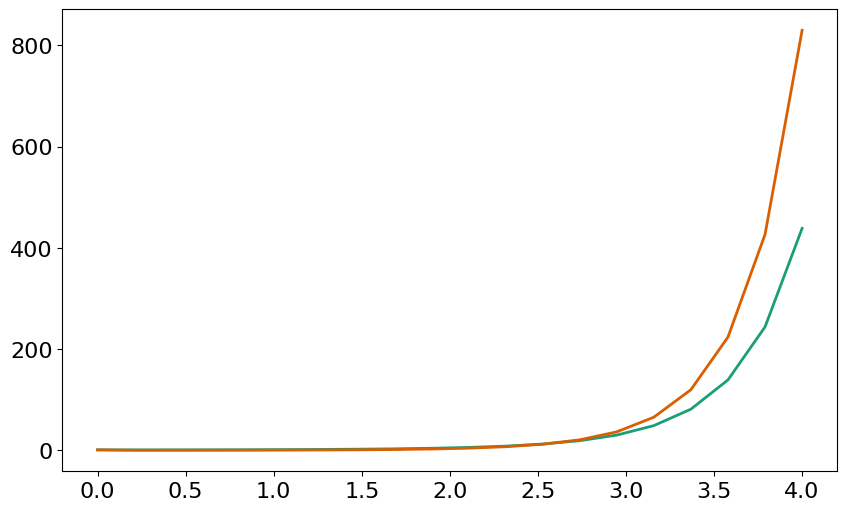

In [8]:
import numpy as np
import matplotlib.pyplot as plt


def ode_euler(func, y0, t):
    """
    Euler method to solve ODEs with a single dependent variable.
    Solves dy/dt = f(y, t) numerically for initial condition y(0) = y0.

    Parameters:
    - func: function f(y, t)
    - y0: initial condition
    - t: array of consecutive time points with fixed or variable step size

    Returns:
    - y: array of approximated values
    """
    n_timesteps = len(t)
    y = np.zeros(n_timesteps)
    y[0] = y0
    for n in range(n_timesteps - 1):
        h = t[n+1] - t[n]
        y[n+1] = y[n] + h * func(y[n], t[n])
    return y

def test_func(x, t):
    return x * t

def ode_euler_const(func, y0, t):
    """
    create method to get the as constant approximated values for dx/dt = f(y, t)

    """

    n_timesteps = len(t)
    y = np.zeros(n_timesteps)
    z = np.zeros(n_timesteps)
    y[0] = y0
    z[0] = y0
    for n in range(n_timesteps - 1):
        h = t[n+1] - t[n]
        y[n+1] = y[n] + h * func(y[n], t[n])
        z[n+1] = func(y[n+1], t[n+1]) - func(y[n], t[n])
    return z


test_timeframe = np.linspace(0, 4, 20)

test_sol = ode_euler(test_func, 1, test_timeframe)
test_sol_const =  ode_euler_const(test_func, 1, test_timeframe)

plt.plot(test_timeframe, test_sol)
plt.plot(test_timeframe, test_sol_const)



### Vergleich mit `scipy.integrate.odeint`
Als (bessere) Alternative zum selbst implementierten Euler-Verfahren können wir auch `odeint` aus dem `scipy.integrate`-Modul verwernden

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

***Beispiel:***

Gegeben sei:

$$ \dfrac{dy}{dt} = f(y,t)= -y$$
 mit $y(0)=4$.

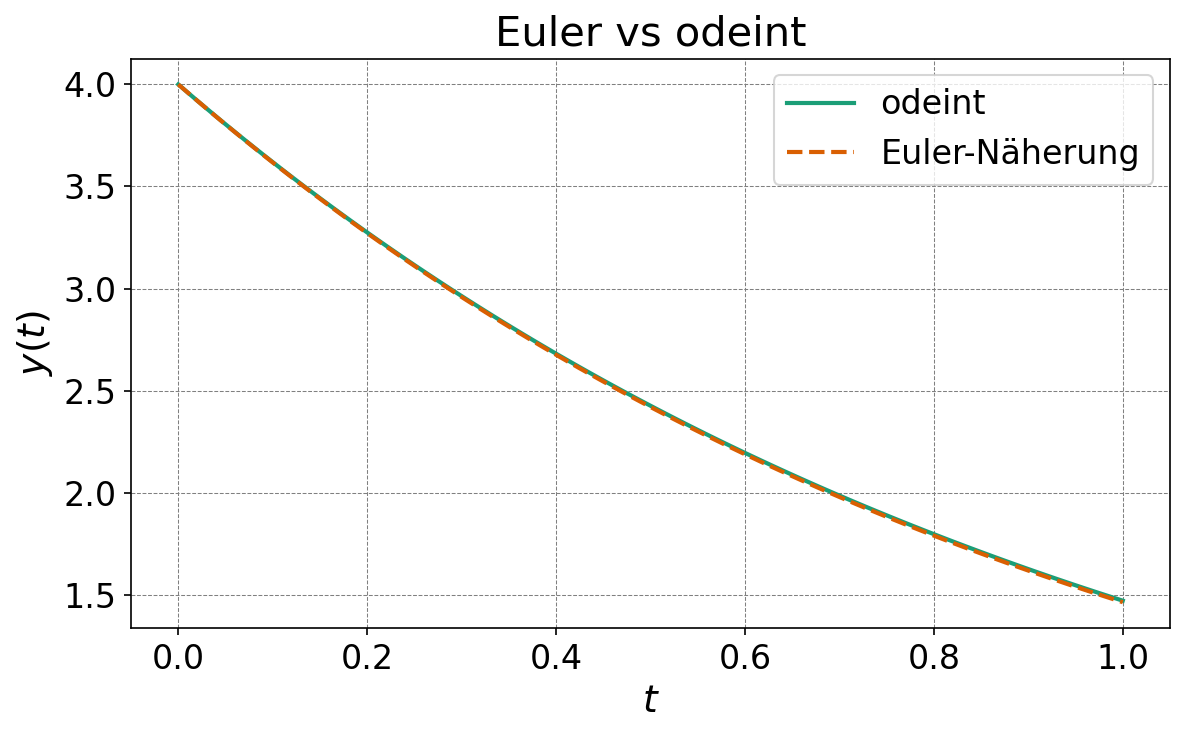

In [3]:
# Define the time range: from 0 to 1 with 100 steps
t = np.linspace(0, 1, 100)
# Define the differential equation dy/dt = -y
f = lambda y, t : -y
# Initial value
y0 = 4
# Compute the solutions
y_euler = ode_euler(f, y0, t)
y_scipy = odeint(f, y0, t).flatten()  # flatten because odeint returns a 2D array
# Plotting the results
plt.figure(figsize=(8, 5), dpi=150)
plt.plot(t, y_scipy, '-', label='odeint', linewidth=2)
plt.plot(t, y_euler, '--', label='Euler-Näherung', markersize=4)
plt.title("Euler vs odeint")
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Aufgabe 3: Leaky integrator ohne Input-Strom
Wir untersuchen das Verhalten des LI-Neurons für den Fall ohne Input-Strom $I_{in}=0$. Wir setzen $V(0) = -100 mV$ und berechnen $V(t)$ für $0<t<0.1 \space s$.

- Berechnen Sie zuerst $V_1$ und $V_2$ 'per Hand'. Setzen Sie dafür $h = 0.5 \space s$.

- Lösen Sie die DGL mit dem ***Euler-vorwärts-Verfahren*** sowie `odeint`.  Vergleichen Sie die numerische Lösung mit der analytischen Lösung. 

- Verwenden Sie beim Euler-Verfahren unterschiedliche Schrittweiten $\Delta t$. Wie verhält sie der numerische Fehler für verschiedene Schrittweiten $\Delta t = 0.1, 0.01, 0.001, 0.0001$?

- Wie erklären Sie den Fehler des Euler-Verfahrens?

Wir verwenden im Weiteren `odeint`.

- Ändern Sie das Ruhepotential ($V_{leak}$). Was beobachten Sie?

- Ändern sie die spezifische Leitfähigkeit der Membran ($g_L$). Was beobachten Sie?

- Ändern sie die spezifische Kapazität der Membran ($c_m$). Was beobachten Sie?

In [39]:
def leaky_int_func(y0, h, iterations):

    result_arr = [0] * iterations
    result_arr[0] = y0

    for i in range(1, iterations):
        result_arr[i] = result_arr[i-1] + h * (-(g_l / c_m) * (y0 - v_leak))

    return result_arr
    

print(leaky_int_func(-100, 0.5, 10))

#ode_euler()

-100
1398.8611175357303
2897.7222350714605
4396.583352607191
5895.444470142921
7394.305587678651
8893.166705214382
10392.027822750113
11890.888940285844
[-100, 1398.8611175357303, 2897.7222350714605, 4396.583352607191, 5895.444470142921, 7394.305587678651, 8893.166705214382, 10392.027822750113, 11890.888940285844, 13389.750057821575]


### Analytische Lösung:
Die folgende Python-Funktion berechnet die exakte Lösung $V(t)$ für einen konstanten Input-Strom im LI-Neuron. Wir vergleichen die exakte Lösung mit unserer numerischen Lösung.

In [88]:
def leaky_int_exact_solution(v_0, t):
    """
    Compute exact solution of the leaky integrator for constant input current.

    Parameters:
    - v_0: initial condition
    - t: array of time points

    Other parameters used inside:
    - g_l: membrane conductance
    - c_m: membrane capacitance
    - v_leak: resting potential
    - i_in: input current (function of t)

    Returns:
    - v: array of membrane potentials
    """
    return (v_0 - v_leak - i_in(t) / g_l) * np.exp(-t / (c_m / g_l)) + v_leak + i_in(t) / g_l

### Dynamische Form:
Zeitableitung der Membranspannung $V(t)$:
$$
\frac{dV}{dt}=f_{LeakyIntegrator}(V,t)
$$

In [89]:
################
# Aufgabe: Definieren Sie f(V, t)
################

def f_leaky_integrator(v,t):
    """
    Compute dV/dt for the leaky integrator.

    Parameters:
    - v: membrane potential at time t
    - t: time

    Uses global parameters:
    - g_l, c_m, v_leak, i_in

    Returns:
    - dV/dt
    """
    return '''TODO''' # Implement the function here

In [4]:
################
# Aufgabe Implementierung der numerischen Lösung
################
"""
implementation of Euler-integration
time-step h is difference between two consecutive points; h_n = t[n+1] - t[n]
"""
N = 10 # number of time steps
t_0, t_max = 0., 0.1 # where to solve t_0<t<t_max, [seconds]
t = np.linspace(t_0, t_max, N+1)  # array of all time steps for iterative solution

# no input current
i_in = lambda t : 0

# initial condition
v_0 = -0.100 # V

##############
# set parameters to standard values
set_parameters()

# then change parameters here!
v_leak= -0.07 
c_m= 0.01
g_l= 0.3
tau_m = c_m / g_l
############


print("Parameters used in simulation:")
print('v_leak:', v_leak)
print('c_m:', c_m)
print('g_l:', g_l)

# solve 
v_euler = '''TODO'''
v_scipy = '''TODO'''
v_exact = '''TODO'''

# plot the solutions
fig = plt.figure(dpi=150, figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(t, v_euler, 'k-', label='Euler method')
ax.plot(t, v_scipy, 'r-.', label='scipy odeint')
ax.plot(t, v_exact, 'y--', label='exact solution')
ax.set_xlabel('time [s]')
ax.set_ylabel('membrane voltage [V]')
ax.legend()
plt.show()

NameError: name 'set_parameters' is not defined

## Lösung 3

TODO

## Zusatz zur numerischen Stabilität des Euler-Verfahrens
Wir lösen die DGL (Leaky Integrator) für $t_{max} = 1 \space s$ mit dem Euler-Verfahren. Wir starten bei N=100 Zeitschritten und verringern die Anzahl der Zeitschritte bei konstantem $t_{max} = 1 \space s$. 

Wir untersuchen nun:  
- Bei welchem N beginnt die Lösung zu oszillieren? 
- Ab wann divergiert die Lösung?
- Wie könnte man überprüfen, ob die numerische Lösung stabil ist?


### Aufgabe 4: Leaky Integrator mit konstantem Elektrodenstrom

#### Konstanter Elektrodenstrom

Modellieren Sie zunächst einen **konstanten Elektrodenstrom**.

- Wie hoch muss die Stromstärke gewählt werden, um die Membranspannung dauerhaft sehr nahe bei $-0.100 V$ zu halten? Schätzen Sie die Stromstärke pro Fläche, sowie die Gesamtstromstärkte ungefähr ab.

- Was bedeutet ein positiver bzw. negativer Strom?

---

#### Periodischer Elektrodenstrom

Modellieren Sie nun einen **oszillierenden Elektrodenstrom** mit Frequenz $f$:

$$
i(t) = i_0 \sin(\omega t), \quad \omega = 2\pi f
$$

-  Wie müssen Amplitude $i_0$ und Frequenz $f$ gewählt werden, damit die Membranspannung eine Amplitude von etwa $20\,\mathrm{mV}$ und eine Frequenz von $10\,\mathrm{Hz}$ aufweist?

- Erhöhen Sie anschließend die Frequenz $f$, während die Stromamplitude konstant bleibt.  
  Wie verändert sich der Verlauf der Membranspannung?

In [93]:
################
# Aufgabe
################

N = 1000 # number of time steps
t_0, t_max = 0., 1. # [seconds]
t = np.linspace(t_0, t_max, N+1)

# initial condition
v_0 = -0.100 

# set parameters to standard values
set_parameters()

# input current per unit area/surface
freq = """TODO""" # cycles per second
omega = 2. * np.pi * freq 
current_ampl = """TODO""" # current [A]
const_current = """TODO""" # [A/m^2]
i_in = lambda t: np.sin(omega * t) * current_ampl / a + const_current # per unit area

# solve 
v_scipy = odeint(f_leaky_integrator, v_0, t)

# plot the solutions
fig = plt.figure(dpi=150, figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(t, v_scipy, 'k-', label='scipy odeint')
ax.set_xlabel('time [s]')
ax.set_ylabel('membrane voltage [V]')
ax.legend()
plt.show()

TypeError: can't multiply sequence by non-int of type 'float'



### Optional - Aufgabe 5: Low Pass Filter

Berechnen Sie für periodische Inputs $i_{in}$ die Amplitude der Schwingung des Membranpotentials. Messen Sie die Amplitude für verschiede Frequenzen 1Hz<f<1000Hz und visualisieren Sie den Zusammenhang.

Welchen Einfluss hat eine Veränderung von Leitfähigkeit und Membrankapazität auf die Filtereigenschaften? 

Wie erklären Sie das Ergebnis Biophysikalisch?


In [ ]:
def get_amplitude(v, v_leak):
    """
    very rough estimate of amplitude 
    get max and min of voltage trace and divide difference by two
    only works if temporal behaviour of voltage trace does not change!
    """
    v = v[len(v)//5:]  # ignore initial time steps
    max_v = np.max(v)
    min_v = np.min(v)
    ampl = (max_v - min_v) / 2.
    return ampl

In [ ]:
################
# Aufgabe
################

fig = plt.figure(dpi=150, figsize=(10,6))
ax = fig.add_subplot(111)

N = 1000 # number of time steps
t_0, t_max = 0., 1. # [seconds]
t = np.linspace(t_0, t_max, N)

# initial condition
v_0 = -0.070 

##############
# set parameters to standard values
set_parameters()
# then change parameters here!
v_leak= -0.07 
c_m= 0.010000592999999999
g_l= 0.3
tau_m = c_m / g_l
############

# different frequencies of input current
sin_freqs = [1 + 10 * i for i in range(0, 30)]
i_el=1.9e-11
v_amps=[]

for freq in sin_freqs:  # cycles per second

    """TODO"""
    """TODO"""
    """TODO"""
    """TODO"""
    """TODO"""
    """TODO"""
    v = """TODO"""

    amp = get_amplitude(v, v_leak)
    v_amps.append(amp)
    

ax.plot(sin_freqs, v_amps, '-', marker='x', label=r'$\tau_m=${tau:.4f}s'.format(tau=tau_m))
ax.set_xlabel('input frequency [Hz]')
ax.set_ylabel('membrane voltage\n amplitude [V]')
ax.legend(loc='upper right')
plt.show()

print(g_l, c_m)
set_parameters()
g_l, c_m

### Lösung 5



In [ ]:
# ursprünglicher Wert
c_m, g_l

# Hausaufgaben:
### Aufgabe 6: 
Lösen Sie die Differentialgleichungen **A)** bis **D)** aus **Aufgabe 1** **numerisch** (verwenden Sie das Euler-Verfahren oder `odeint`).  
Vergleichen Sie die numerische Lösung mit der jeweils **analytischen Lösung**.

---

**Hinweis:**  
Überlegen Sie sich für jede DGL (geeignete) Anfangsbedingungen.  
Optional: Untersuchen Sie erneut, wie sich die Schrittweite $\Delta t$ auf die Genauigkeit der Lösung auswirkt.

---